# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
emails =  pd.read_csv('email_events_202101071339.csv')
orders =  pd.read_csv('orders_202101071341.csv')
products =  pd.read_csv('products_202101071344.csv')

# merge data

In [3]:
orders_products = pd.merge(orders.copy(), products.copy(), how='left',left_on='product_id', right_on='product_id')
emails_orders_products = pd.merge(emails.copy(), orders_products.copy(), how='left',left_on='customer', right_on='customer')

In [4]:
orders_products.head()

,order_id,customer,created_at,product_id,discount,refunded,price
0,3,2,2019-05-09,1,0.15,0,20
1,7,4,2019-08-11,1,0.15,0,20
2,11,5,2020-06-09,9,0.00,0,30
3,15,8,2020-06-08,7,0.00,0,50
4,19,10,2019-10-31,1,0.00,0,20


In [5]:
emails_orders_products.head()

,event_id,customer,event_name,campaign,event_date,order_id,created_at,product_id,discount,refunded,price
0,140801,1533,Received Email,632ff6402f17a6c96e17bdebffb9dcfa,2020-04-03,2304,2018-08-24,6,0.0,0,35
1,140805,1533,Received Email,4ea861b70be346fb1b3475a8ed953254,2020-02-07,2304,2018-08-24,6,0.0,0,35
2,140809,1533,Received Email,f0d07f7556bf88ab984a1f44e99e48b4,2019-12-13,2304,2018-08-24,6,0.0,0,35
3,140813,1533,Received Email,9a32642f15f2657d118baf7e572b0e81,2019-10-18,2304,2018-08-24,6,0.0,0,35
4,140817,1533,Received Email,bdc4d58ad5fde3ad8c5143452c668f73,2019-08-23,2304,2018-08-24,6,0.0,0,35


In [6]:
# add a new coloum:real price
disc = list(orders_products['discount'])
price = list(orders_products['price'])
orders_products['real_price']= [(1-disc[i])*price[i] for i,j in enumerate(disc)]

# Data visualization

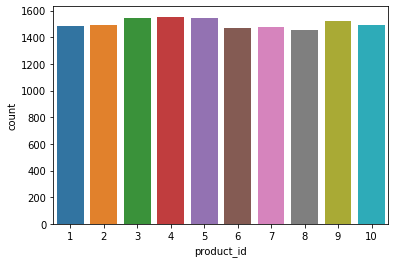

In [7]:
# count plot on single categorical variable
sns.countplot(x ='product_id', data = orders_products)

In [8]:
#add a column year to the table
dateY = list(orders_products['created_at'])
orders_products['Year'] = [i[0:4] for i in dateY]
orders_products['Month'] = [i[5:7] for i in dateY]

In [9]:
orders_products.head()

,order_id,customer,created_at,product_id,discount,refunded,price,real_price,Year,Month
0,3,2,2019-05-09,1,0.15,0,20,17.0,2019,05
1,7,4,2019-08-11,1,0.15,0,20,17.0,2019,08
2,11,5,2020-06-09,9,0.00,0,30,30.0,2020,06
3,15,8,2020-06-08,7,0.00,0,50,50.0,2020,06
4,19,10,2019-10-31,1,0.00,0,20,20.0,2019,10


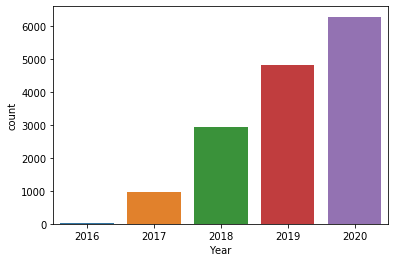

In [10]:
#number of orders per year 
sns.countplot(x ='Year', data = orders_products)

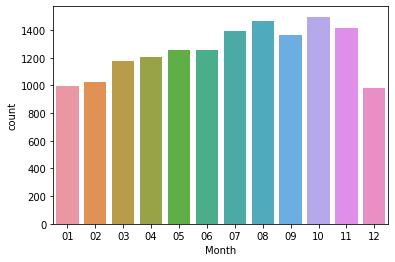

In [11]:
#number of orders per month for year ..
sns.countplot(x ='Month', data = orders_products)

In [12]:
#income amount per product
Income_product = orders_products.groupby(["product_id"], as_index=False)['real_price'].sum()
Income_product

,product_id,real_price
0,1,28694.00
1,2,72122.50
2,3,82293.75
3,4,112848.75
4,5,67457.25
5,6,49876.75
6,7,71087.50
7,8,126814.50
8,9,44289.00
9,10,143925.00


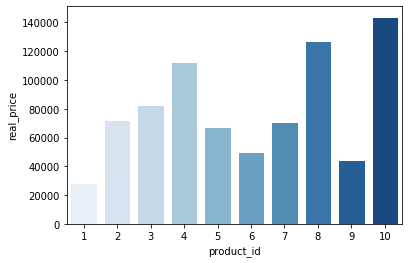

In [13]:
sns.barplot(x = 'product_id', y = 'real_price', data = Income_product,
            palette = 'Blues', edgecolor = 'w')

In [14]:
#income amount per customer
Income_customer = orders_products.groupby(["customer"], as_index=False)['real_price'].sum()
Income_customer.head()

,customer,real_price
0,1,55.00
1,2,221.75
2,3,100.00
3,4,167.00
4,5,160.00


In [15]:
#amount of money per time
Income_time = orders_products.groupby(["Month"], as_index=False)['real_price'].sum()
Income_time.head()

,Month,real_price
0,01,52845.25
1,02,54755.50
2,03,64521.50
3,04,63116.25
4,05,67135.25


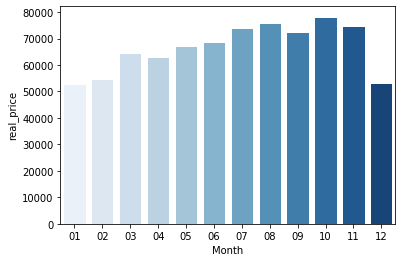

In [16]:
sns.barplot(x = 'Month', y = 'real_price', data = Income_time,
            palette = 'Blues', edgecolor = 'w')